# Segmentation par croissance de région

## Enoncé :
L’objectif de ce TP est de réaliser une fonction de croissance de région. La segmentation par croissance de région consiste à choisir un pixel dans l’image appelé germe puis à agglomérer les pixels voisins jusqu’au plus aucun pixel ne peut être ajouté à la région en satisfaisant le critère d’homogénéité.
Les résultats obtenus par cet algorithme dépendent du critère d’homogénéité choisi.

Appliquer cet algorithme en utilisant deux critères d’homogénéité différents (max-min et variance).

In [18]:
import numpy as np
import cv2
import matplotlib.image as mpimg    
import matplotlib.pyplot as plt    
from PIL import Image
from scipy import ndimage

In [19]:
# fonction pour obtenir les coordonnées apartir de clique dans l'image 
def on_mouse(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        print ('Start Mouse Position: ' + str(x) + ', ' + str(y))
        s_box = x, y
        boxes.append(s_box)

In [20]:
# cree une class point 
class Point(object):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    def getX(self):
        return self.x
    def getY(self):
        return self.y

In [21]:
# fonction pour obtenir la différence de couleur entre 2 points 
def getGrayDiff(img,currentPoint,tmpPoint):
    return abs(int(img[currentPoint.x,currentPoint.y]) - int(img[tmpPoint.x,tmpPoint.y]))

In [22]:
# fonction pour sélectionner les voisin d'un point
def selectConnects(p):
    if p != 0:
        connects = [Point(-1, -1), Point(0, -1), Point(1, -1), Point(1, 0), Point(1, 1), Point(0, 1), Point(-1, 1), Point(-1, 0)]
    return connects

In [23]:
# fonction pour calcule la région
def regionGrow(img,seeds,thresh,p =1):
    height, weight = img.shape # extraire la hauteur et largeur de l'image
    seedMark = np.zeros(img.shape) # construire une image vide de la même taille de l'image original
    seedList = []  # créer une liste pour remplire par les point qui entrent dans la region
    for seed in seeds:
        seedList.append(seed) # remplire la liste par les point obtenu
    label = 1 # pour la couleur blanc
    connects = selectConnects(p) # appel fonction pour obtenir les voisin
    while(len(seedList)>0):
        currentPoint = seedList.pop(0) # sélectionner le point courant à partir de la liste
        seedMark[currentPoint.x,currentPoint.y] = label  # metre la couleur de point courant en blanc
        for i in range(8): # boucle pour traiter tous les voisin
            tmpX = currentPoint.x + connects[i].x # la coordonnée x de le n eme voisin
            tmpY = currentPoint.y + connects[i].y # la coordonnée y de le n eme voisin
            if tmpX < 0 or tmpY < 0 or tmpX >= height or tmpY >= weight: # condition pour éviter les point de l'extrémité de l'image
                continue
            grayDiff = getGrayDiff(img,currentPoint,Point(tmpX,tmpY)) # calculate color difference ( utiliser le critère min-max)
            if grayDiff < thresh and seedMark[tmpX,tmpY] == 0: # comparer la différence avec un  seille
                seedMark[tmpX,tmpY] = label
                seedList.append(Point(tmpX,tmpY)) # en ajouté dans seedList
    return seedMark # retourner l'image de la région 

In [24]:
boxes = []
filename = 'image.jpg'
img = cv2.imread('C:\\Users\\moham\\OneDrive\\Bureau\\unnamed.jpg',0)
cv2.namedWindow('input')
cv2.setMouseCallback('input', on_mouse, 0,)
cv2.imshow('input', img)
cv2.waitKey()
print ('Starting region growing based on last click')
seed = boxes[-1] # le point sélectionné
x = seed[0]
y = seed[1]
seeds = [Point(y,x)] # le point sélectionné
binaryImg = regionGrow(img,seeds,10) # 10 le seille de la différence
cv2.imshow(' ',binaryImg)
cv2.waitKey(0)

Start Mouse Position: 119, 189
Starting region growing based on last click


-1

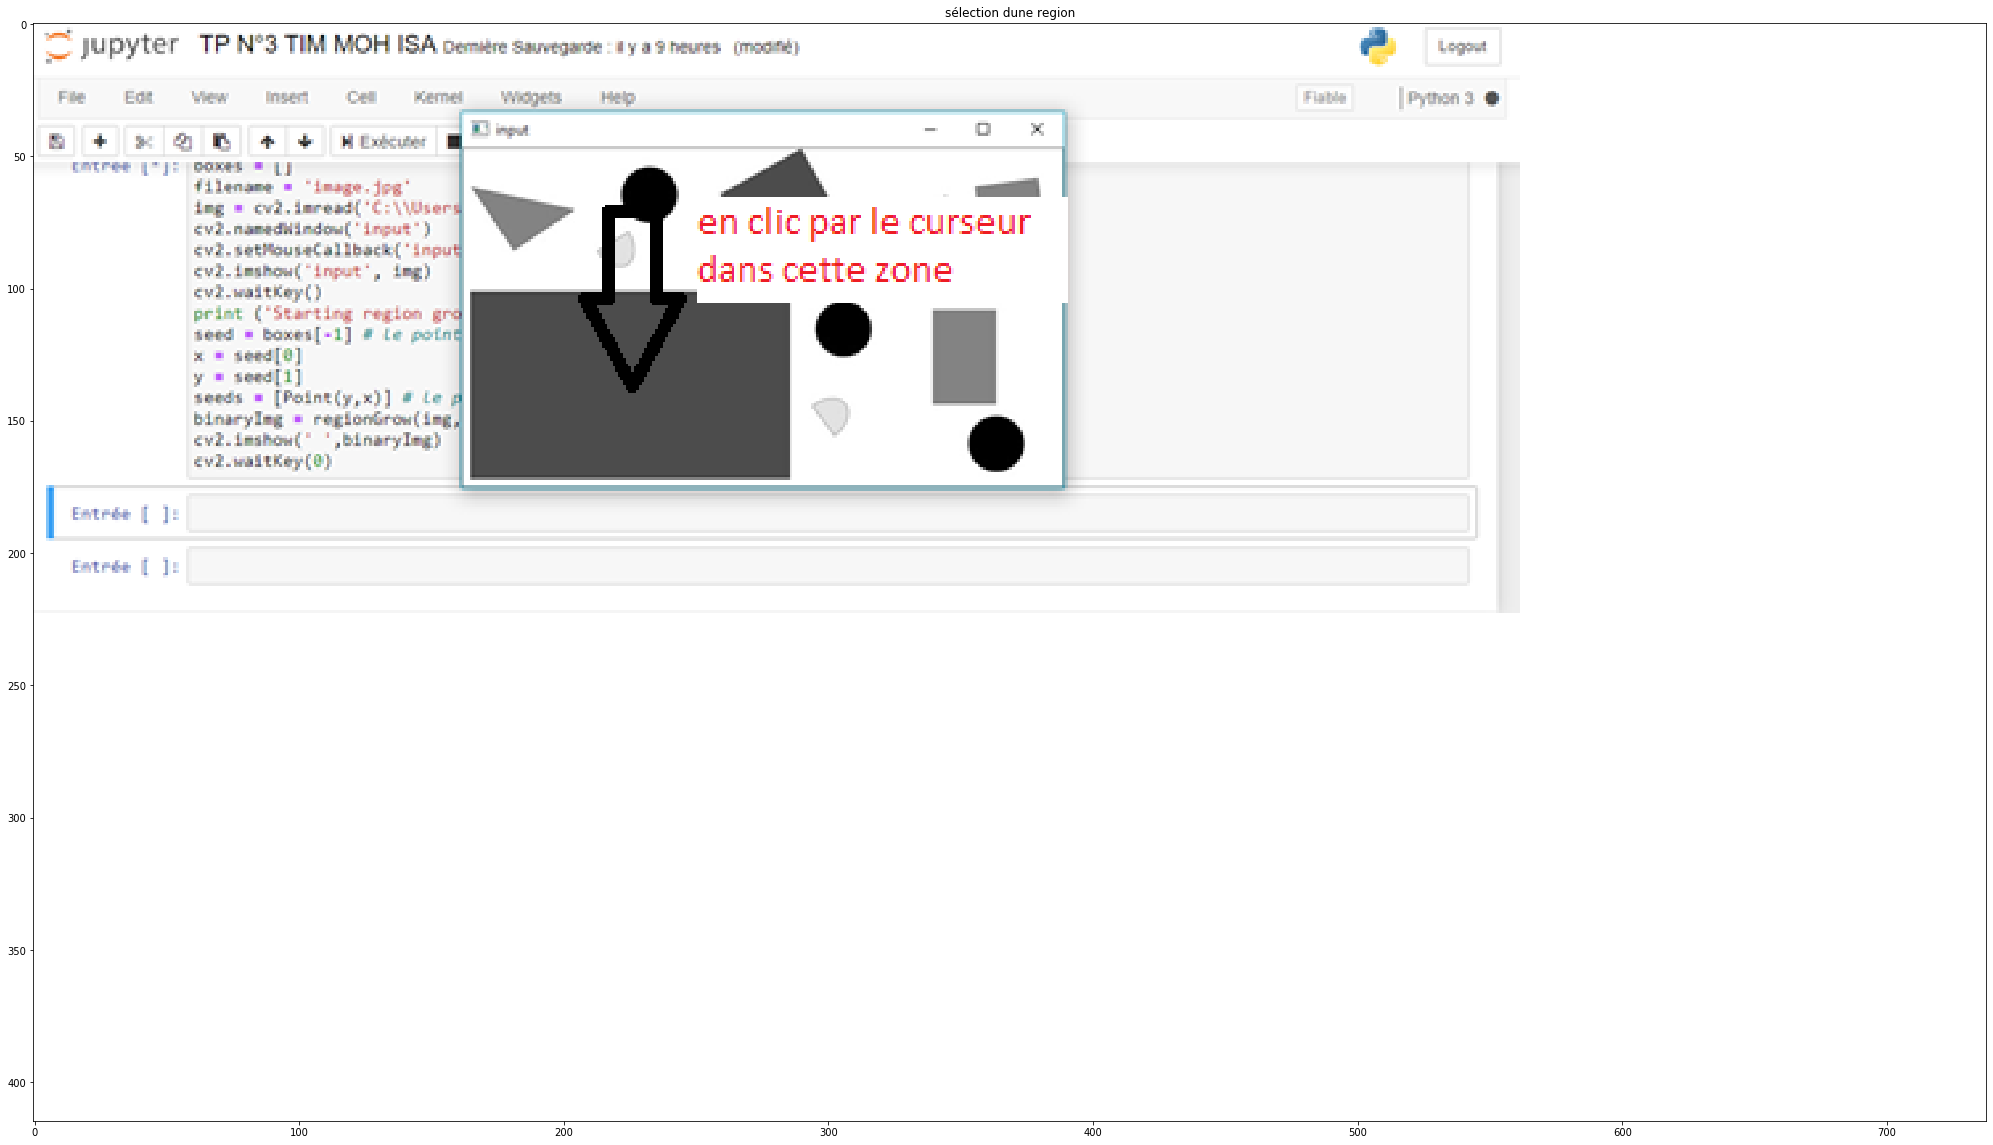

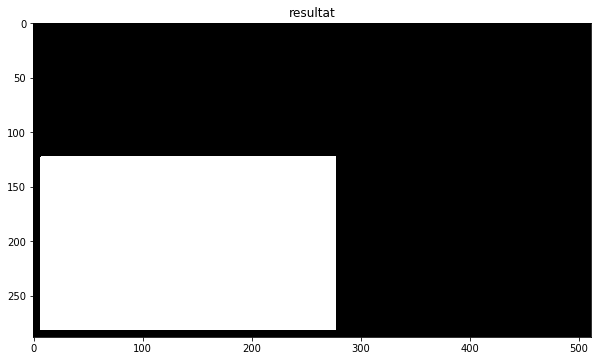

In [35]:
gr = Image.open("C:\\Users\\moham\\OneDrive\\Bureau\\gr.png") #ouvrir et conserver l'image dans imgpil
f, axs = plt.subplots(1,1,figsize=(35,35))
plt.subplot(1,1,1)
plt.title('sélection d''une region')
plt.imshow(gr)
f, axs = plt.subplots(1,1,figsize=(10,10))
plt.subplot(1,1,1)
plt.title('resultat')
plt.imshow(binaryImg,cmap='gray')